## This is the 2-layer neural network notebook for ECE C147/C247 Homework #3

Please follow the notebook linearly to implement a two layer neural network.

Please print out the notebook entirely when completed.

The goal of this notebook is to give you experience with training a two layer neural network.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import sys
sys.path.append('/content/drive/MyDrive/247-NeuralNetwork/247-hw3/HW3_code')
import random
import numpy as np
from utils.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

## Toy example

Before loading CIFAR-10, there will be a toy example to test your implementation of the forward and backward pass. Make sure to read the description of TwoLayerNet class in neural_net.py file , understand the architecture and initializations

In [2]:
from nndl.neural_net import TwoLayerNet

In [3]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

In [4]:
print(X,y)

[[ 16.24345364  -6.11756414  -5.28171752 -10.72968622]
 [  8.65407629 -23.01538697  17.44811764  -7.61206901]
 [  3.19039096  -2.49370375  14.62107937 -20.60140709]
 [ -3.22417204  -3.84054355  11.33769442 -10.99891267]
 [ -1.72428208  -8.77858418   0.42213747   5.82815214]] [0 1 2 2 1]


### Compute forward pass scores

In [5]:
## Implement the forward pass of the neural network.
## See the loss() method in TwoLayerNet class for the same

# Note, there is a statement if y is None: return scores, which is why 
# the following call will calculate the scores.
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
    [-1.07260209,  0.05083871, -0.87253915],
    [-2.02778743, -0.10832494, -1.52641362],
    [-0.74225908,  0.15259725, -0.39578548],
    [-0.38172726,  0.10835902, -0.17328274],
    [-0.64417314, -0.18886813, -0.41106892]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scor111211es and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

correct scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

Difference between your scor111211es and correct scores:
3.3812311957259755e-08


### Forward pass loss

In [6]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.071696123862817

# should be very small, we get < 1e-12
print("Loss:",loss)
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Loss: 1.071696123862817
Difference between your loss and correct loss:
0.0


### Backward pass

Implements the backwards pass of the neural network.  Check your gradients with the gradient check utilities provided.

In [7]:
from utils.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('{} max relative error: {}'.format(param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 2.963221034761121e-10
b2 max relative error: 1.839165909006465e-10
b1 max relative error: 3.1726806716844575e-09
W1 max relative error: 1.283285096965795e-09


### Training the network

Implement neural_net.train() to train the network via stochastic gradient descent, much like the softmax and SVM.

Final training loss:  0.014497864587765875


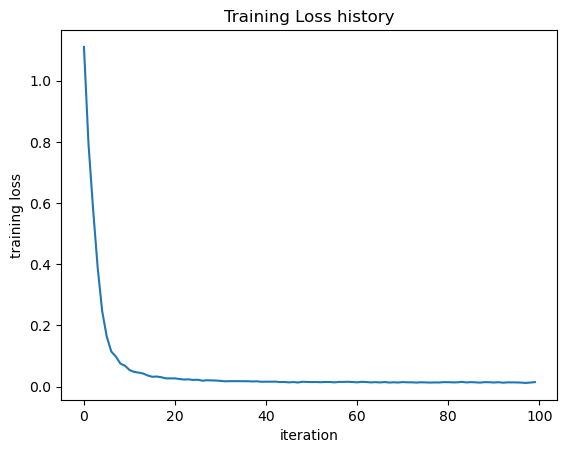

In [8]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

## Classify CIFAR-10

Do classification on the CIFAR-10 dataset.

In [10]:
from utils.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. 
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = '/Users/yiwenzhang/Desktop/23winter/247 neural network/hw2/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


### Running SGD

If your implementation is correct, you should see a validation accuracy of around 28-29%.

In [11]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

# Save this net as the variable subopt_net for later comparison.
subopt_net = net

iteration 0 / 1000: loss 2.302757518613176
iteration 100 / 1000: loss 2.3021201657167145
iteration 200 / 1000: loss 2.2956136292668456
iteration 300 / 1000: loss 2.2518260278684843
iteration 400 / 1000: loss 2.188995574979717
iteration 500 / 1000: loss 2.1162531781593175
iteration 600 / 1000: loss 2.0646712637358062
iteration 700 / 1000: loss 1.990168856378208
iteration 800 / 1000: loss 2.0028266168788966
iteration 900 / 1000: loss 1.946516508873091
Validation accuracy:  0.283


## Questions:

The training accuracy isn't great.  

(1) What are some of the reasons why this is the case?  Take the following cell to do some analyses and then report your answers in the cell following the one below.

(2) How should you fix the problems you identified in (1)?


In [12]:
stats['train_acc_history']

[0.095, 0.15, 0.25, 0.25, 0.315]

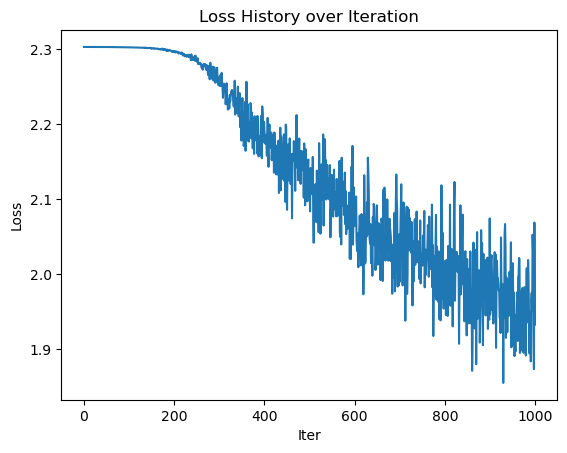

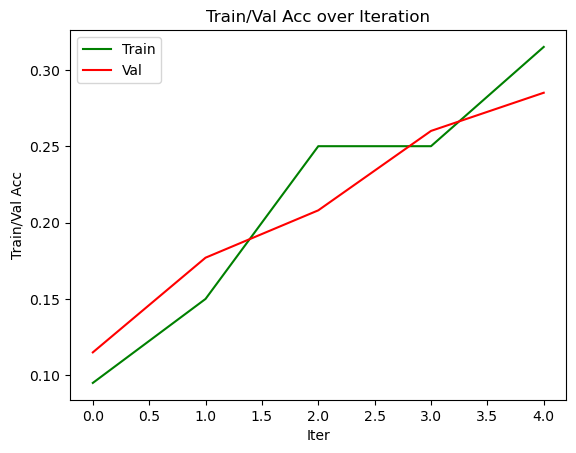

In [13]:
from pickleshare import stat
# ================================================================ #
# YOUR CODE HERE:
#   Do some debugging to gain some insight into why the optimization
#   isn't great.
# ================================================================ #

# Plot the loss function and train / validation accuracies
plt.plot(stats['loss_history'])
plt.title('Loss History over Iteration')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.show()

plt.plot(stats['train_acc_history'], label = 'Train', color = 'green')
plt.plot(stats['val_acc_history'], label = 'Val',color = 'red')
plt.title('Train/Val Acc over Iteration')
plt.xlabel('Iter')
plt.ylabel('Train/Val Acc')
plt.legend(loc=0)
plt.show()

pass
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

## Answers:

(1) The training accuracy shows an increasing trend at the end of iteration, it means our learning rate is too small which causes our model takes so many interations but still doesn't converge. 

Another reason could be that our model is too simple (like only two layers) to do the image classification.

The reason could also be that the regularization is too strong that it's difficult for our model to learn.

(2) We could try to increase the step size of learning rate and try to add more layers to make the model stronger and more capacity so that it can handle better. Or we could decrease the regularization (not decrease too much otherwise it might cause overfitting) And we could also increase the num_iterations and enlarge the batch_size so that our net could learn longer.

## Optimize the neural network

Use the following part of the Jupyter notebook to optimize your hyperparameters on the validation set.  Store your nets as best_net.

Parameters which been optimizaed:

learning rate : 0.0001, 0.0005, 0.001

regularization: 0.05, 0.1, 0.2, 0.3, 0.5

batch_size: 200, 300, 400, 500

num_interation: 2000

Because the optimization of num_iteration here only have 2 options and it usually takes a long time, I split the whole optimization into 2 parts: the 1st is processed by num_ite = 1000, the 2scd is processed by num_ite = 2000.


In [15]:
# When num_iteration is 2000
best_net = None # store the best model into this 
# ================================================================ #
# YOUR CODE HERE:
#   Optimize over your hyperparameters to arrive at the best neural
#   network.  You should be able to get over 50% validation accuracy.
#   For this part of the notebook, we will give credit based on the
#   accuracy you get.  Your score on this question will be multiplied by:
#      min(floor((X - 28%)) / %22, 1) 
#   where if you get 50% or higher validation accuracy, you get full
#   points.
#   Note, you need to use the same network structure (keep hidden_size = 50)!
# ================================================================ #
import joblib
lr = [1e-4, 5*1e-4, 1e-3]
reg = [0.05, 0.1, 0.2,0.3, 0.5]
batch_size = [200,300,400,500]
val_acc_list = []
best_lr, best_reg,best_batch_size = 0, 0, 0
best_val_acc = 0
iter = 0
for i in range(len(lr)):
  for j in range(len(reg)):
    for k in range(len(batch_size)):
      net = TwoLayerNet(input_size, hidden_size, num_classes)
      best_model = net.train(X_train, y_train, X_val, y_val,
              num_iters=2000, batch_size=batch_size[k],
              learning_rate=lr[i], learning_rate_decay=0.95,
              reg=reg[j], verbose=True)
      val_acc = (net.predict(X_val) == y_val).mean()
      val_acc_list.append(val_acc)
      iter+=1
      print(iter, " Interation")
      print('Learning rate: ', lr[i], "Reg: ", reg[j], 
            'Batch size: ', batch_size[k], 'Val_acc: ', val_acc)
      if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_lr = lr[i]
        best_reg = reg[j]
        best_batch_size = batch_size[k]
        joblib.dump(net,'best_model.dat')
      print( )
      print( )
best_net = joblib.load('best_model.dat')
print('Best Learning rate: ', best_lr)
print("Best Reg: ", best_reg)
print("Best Batch Size: ", best_batch_size)
print('Best Val_acc: ', best_val_acc)
pass

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
val_acc = (best_net.predict(X_val) == y_val).mean()
if best_val_acc > 0.5:
  print('Validation accuracy: ', best_val_acc)
else:
  print("The best accuracy at num_iteration = 1000 is lower than 0.5")

iteration 0 / 2000: loss 2.302625426147543
iteration 100 / 2000: loss 2.302168765141486
iteration 200 / 2000: loss 2.2991812040710204
iteration 300 / 2000: loss 2.2641034954578934
iteration 400 / 2000: loss 2.217941694869426
iteration 500 / 2000: loss 2.1770821786296493
iteration 600 / 2000: loss 2.034967902437716
iteration 700 / 2000: loss 2.015380701398895
iteration 800 / 2000: loss 1.9730459987150968
iteration 900 / 2000: loss 2.0030313508883753
iteration 1000 / 2000: loss 1.8902312389513123
iteration 1100 / 2000: loss 1.8836828080267949
iteration 1200 / 2000: loss 2.0152404593949576
iteration 1300 / 2000: loss 1.8135211131982254
iteration 1400 / 2000: loss 1.8747462093197926
iteration 1500 / 2000: loss 1.8300951001302264
iteration 1600 / 2000: loss 1.8692129551574395
iteration 1700 / 2000: loss 1.8774043663892894
iteration 1800 / 2000: loss 1.859324923136817
iteration 1900 / 2000: loss 1.8034393504280757
1  Interation
Learning rate:  0.0001 Reg:  0.05 Batch size:  200 Val_acc:  0.3

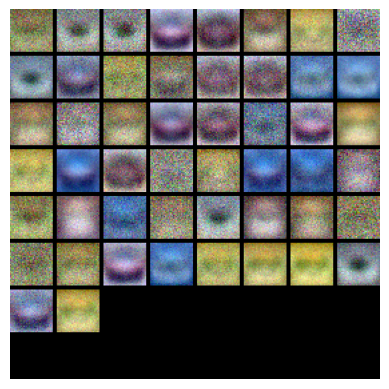

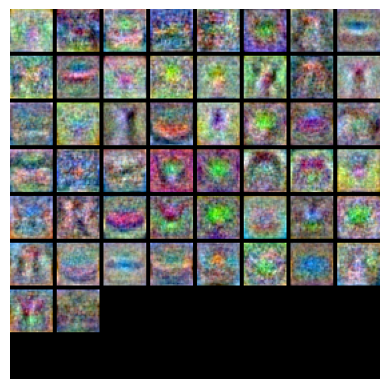

In [16]:
from utils.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.T.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(subopt_net)
show_net_weights(best_net)

## Question:

(1) What differences do you see in the weights between the suboptimal net and the best net you arrived at?

## Answer:

(1) The weights of best net is much clearer than the suboptimal net and the boundary inside the weights image is also more obvious.

(2) We can observe more details in best net. For example, in the suboptimal net, the image on 1st row and 4th col, let's call it (1,4) looks almost the same as (3,4). But in best net, we can find that actually (1,4) and (3,4) still look different. It means the weights of best net could help us obtain more imformation of the features.

## Evaluate on test set 

In [17]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.518
